# Squats from Excel

In [137]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from scipy.integrate import cumulative_trapezoid

Ladder in data.

In [138]:
unityDF = pd.read_csv("unitydata (1).csv")
originalUnityDF = unityDF.copy()

wiiFitDF = pd.read_csv("my_values.csv")

Wii Fit värdena anges i [kg] just nu så de måste multipliceras med 9,82 för att vi ska få kraftutslaget.  
Sedan behöver vi byta ut kolumnnamnen så kod kan återanvändas.

In [139]:
g = 9.82

wiiFitDF['Value'] = wiiFitDF['Value'].map(lambda x: x*g)
wiiFitDF.rename(columns={wiiFitDF.columns[0]:unityDF.columns[0], wiiFitDF.columns[1]:unityDF.columns[1]}, inplace=True)
display(wiiFitDF.head())

,time,force
0,7.47,229.0024
1,7.66,514.7644
2,7.83,706.7454
3,8.00,787.8586
4,8.16,788.4478


In [140]:

rowsToDeleteUnity = 20
rowsToDeleteWiiFit = 59


wiiFitDF.drop(index=range(0, rowsToDeleteWiiFit), inplace=True)
wiiFitDF = wiiFitDF.reset_index()

unityDF.drop(index=range(0, rowsToDeleteUnity), inplace=True)
unityDF = unityDF.reset_index()

    

Tar bort dötid

In [141]:
unityDF.drop(columns=['index'], inplace=True)
wiiFitDF.drop(columns=['index'], inplace=True)

display(unityDF.head())
display(wiiFitDF.head())

,time,force
0,3.34,834.79
1,3.50,834.52
2,3.66,834.69
3,3.82,834.80
4,3.98,834.63


,time,force
0,17.57,830.9684
1,17.74,830.4774
2,17.90,830.3792
3,18.07,830.7720
4,18.25,831.7540


In [142]:
X_1 = unityDF['time'].loc[0]
X_2 = wiiFitDF['time'].loc[0]

print(f"All Unity 'time' shifted back by: {X_1} [s]")
print(f"All Wii Fit 'time' shifted back by: {X_2} [s]")


unityDF['time'] = unityDF['time'].map(lambda x: (x-X_1))
wiiFitDF['time'] = wiiFitDF['time'].map(lambda x: (x-X_2))
display("Unity",unityDF.head(), "Wii Fit" , wiiFitDF.head())


All Unity 'time' shifted back by: 3.34 [s]
All Wii Fit 'time' shifted back by: 17.57 [s]


'Unity'

,time,force
0,0.00,834.79
1,0.16,834.52
2,0.32,834.69
3,0.48,834.80
4,0.64,834.63


'Wii Fit'

,time,force
0,0.00,830.9684
1,0.17,830.4774
2,0.33,830.3792
3,0.50,830.7720
4,0.68,831.7540


Visar upp alla data-punkter

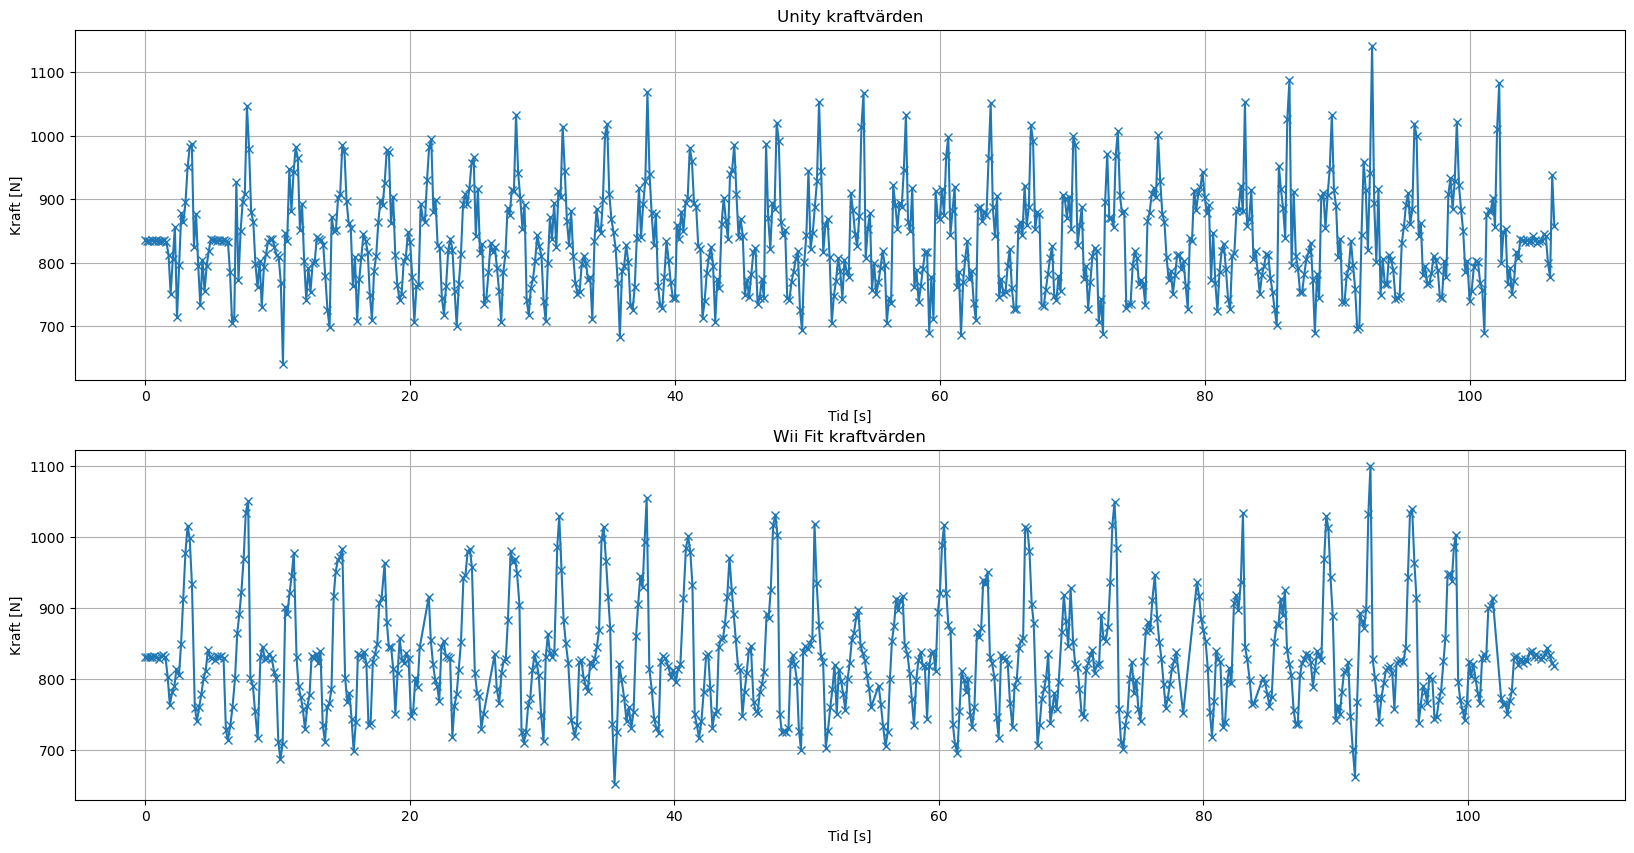

In [143]:

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))

ax1.plot(unityDF['time'], unityDF['force'], marker="x")
#ax.plot(originalUnityDF['time'], originalUnityDF['force'], linestyle='dashed', color = "green")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.set_title("Unity kraftvärden")
ax1.grid()

ax2.plot(wiiFitDF['time'], wiiFitDF['force'], marker="x")
ax2.set_xlabel("Tid [s]")
ax2.set_ylabel("Kraft [N]")
ax2.set_title("Wii Fit kraftvärden")
ax2.grid()
plt.show()

Möjligtvis inttresant [[Källa]](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html)

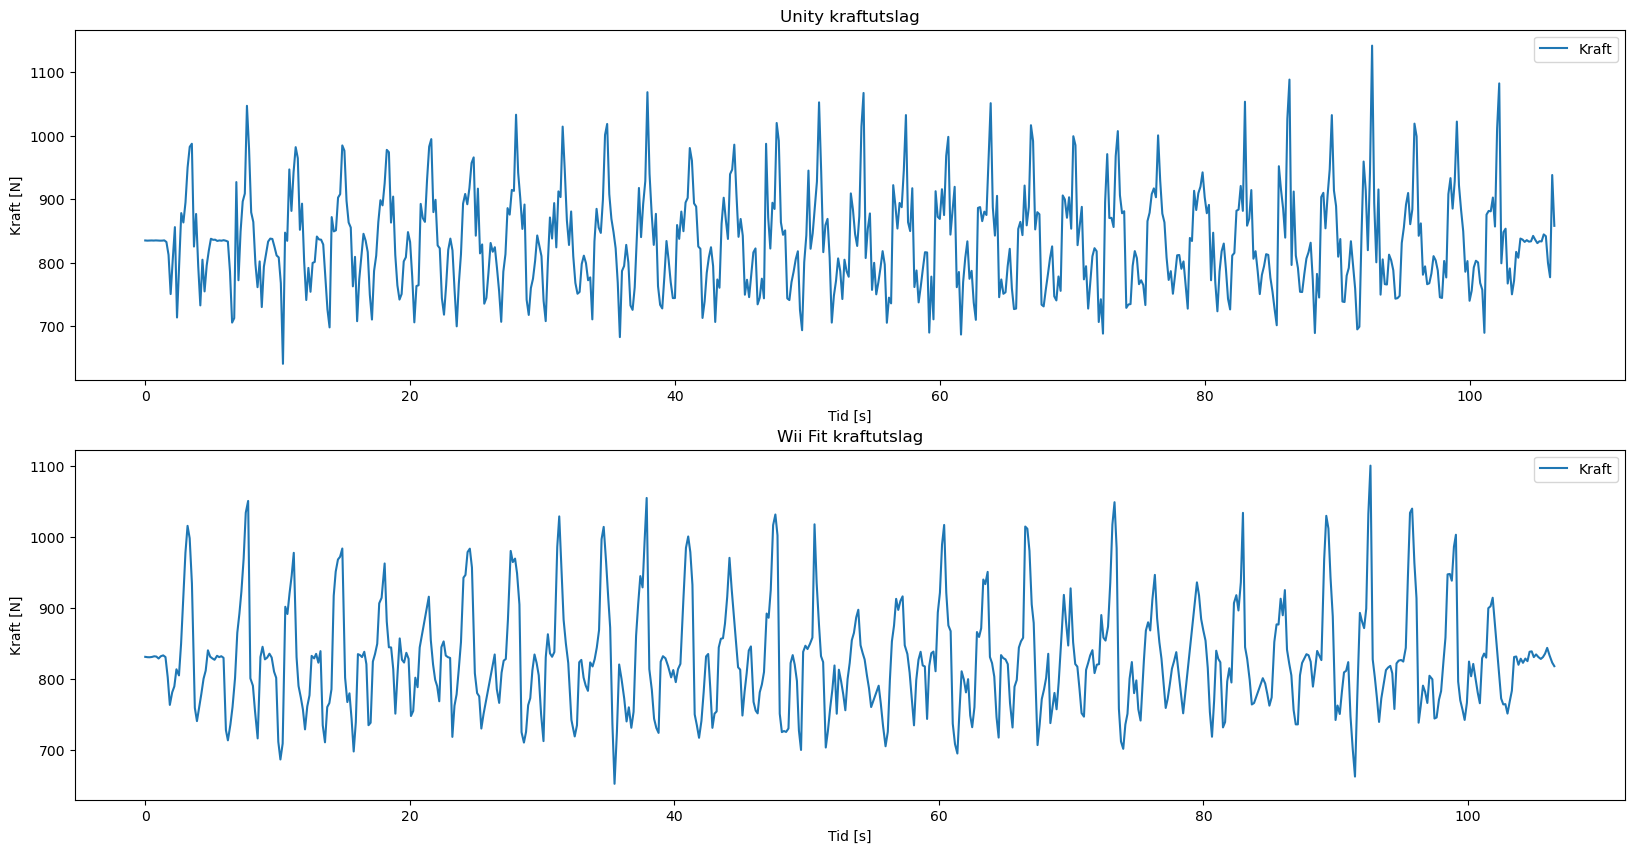

In [144]:

fig, (ax1, ax2) = plt.subplots( 2, 1, figsize=(20,10))

ax1.plot(unityDF['time'], unityDF['force'], label="Kraft")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.set_title("Unity kraftutslag")
ax1.legend()

ax2.plot(wiiFitDF['time'], wiiFitDF['force'], label="Kraft")
ax2.set_xlabel("Tid [s]")
ax2.set_ylabel("Kraft [N]")
ax2.set_title("Wii Fit kraftutslag")
ax2.legend()

plt.show()

#plt.plot(data['time'], data['force'])
#plt.figure().set_size_inches(2000, 10, forward=True)
#plt.show()

Om man lägger de på varandra ges följande.

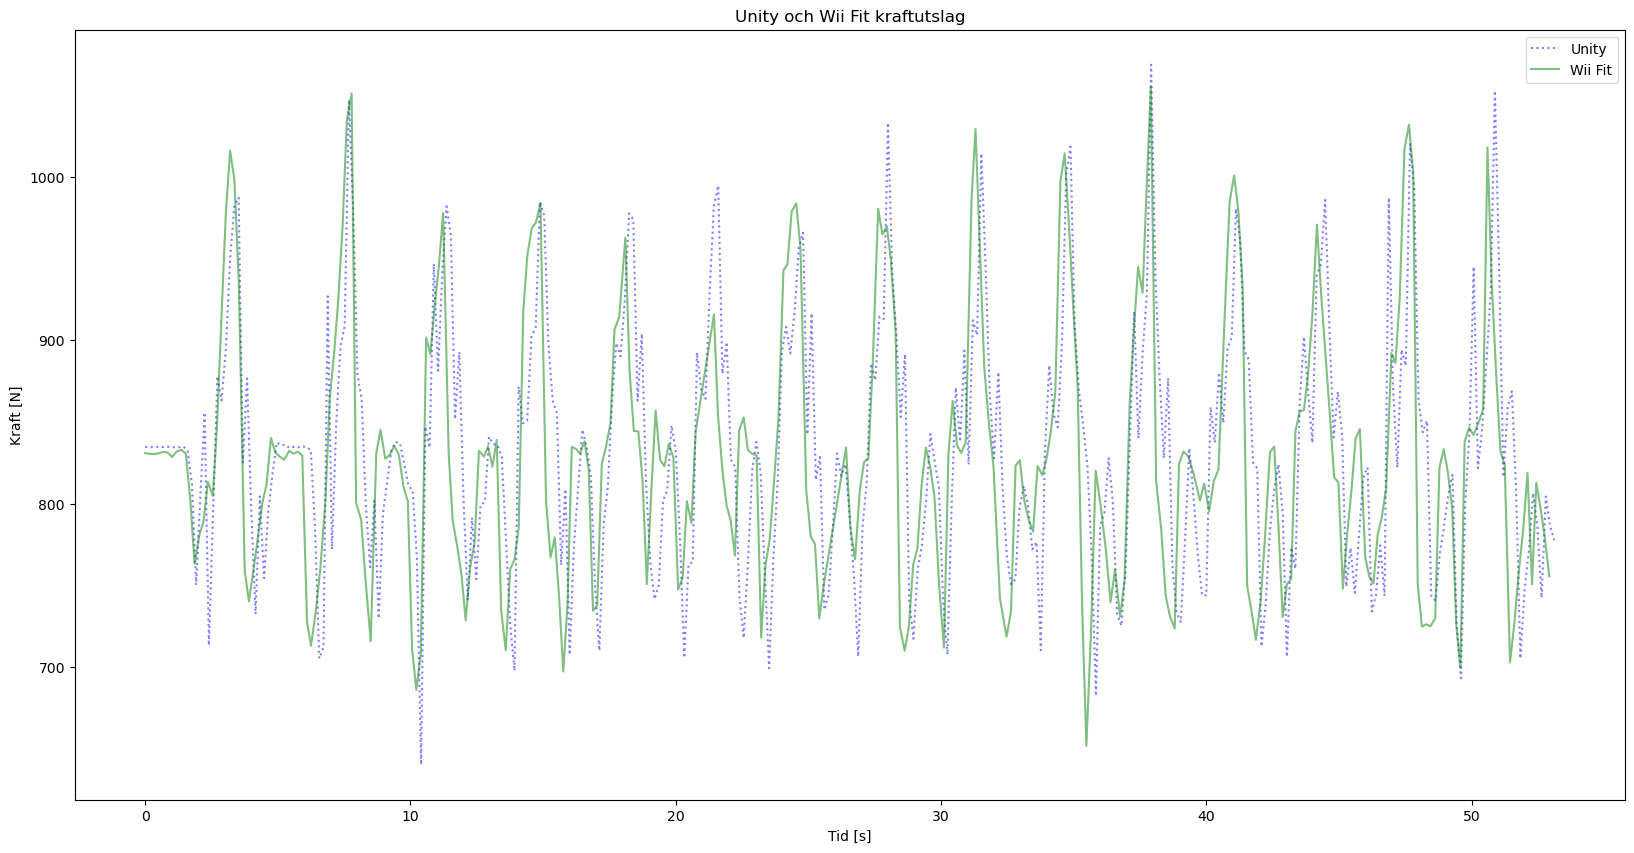

In [145]:

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(unityDF['time'][0:int(unityDF.shape[0]/2)], unityDF['force'][0:int(unityDF.shape[0]/2)], label="Unity", linestyle="dotted", color="blue", alpha=0.5)
ax.plot(wiiFitDF['time'][0:int(wiiFitDF.shape[0]/2)], wiiFitDF['force'][0:int(wiiFitDF.shape[0]/2)], label="Wii Fit", linestyle="solid", color="green", alpha=0.5)


ax.set_title("Unity och Wii Fit kraftutslag")
ax.set_xlabel("Tid [s]")
ax.set_ylabel("Kraft [N]")
ax.legend()



plt.show()

#plt.plot(data['time'], data['force'])
#plt.figure().set_size_inches(2000, 10, forward=True)
#plt.show()

## Area beräkning

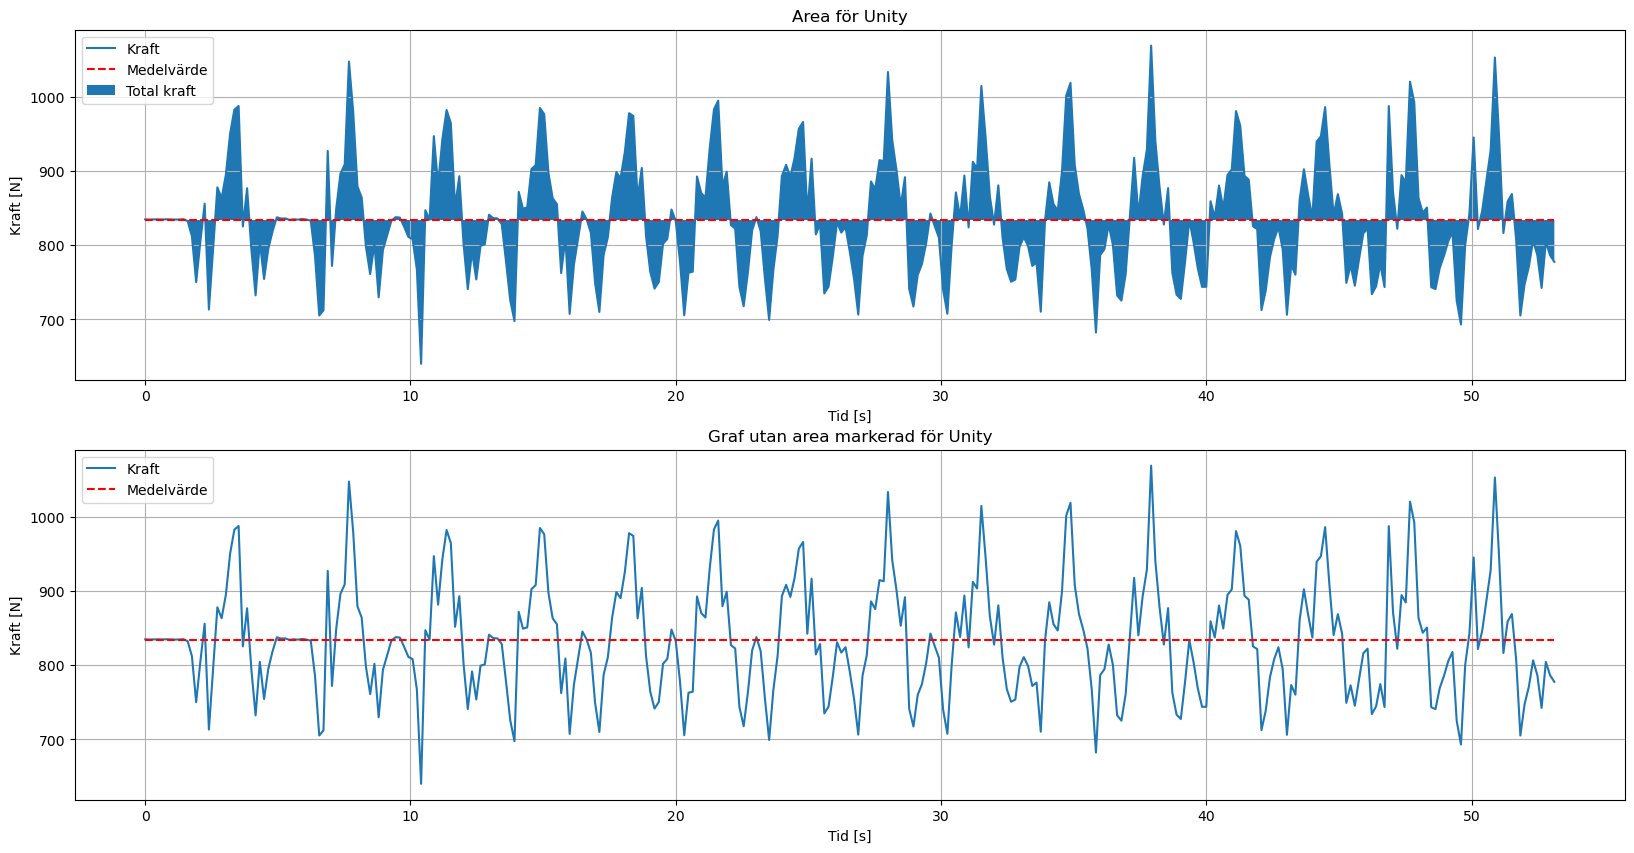

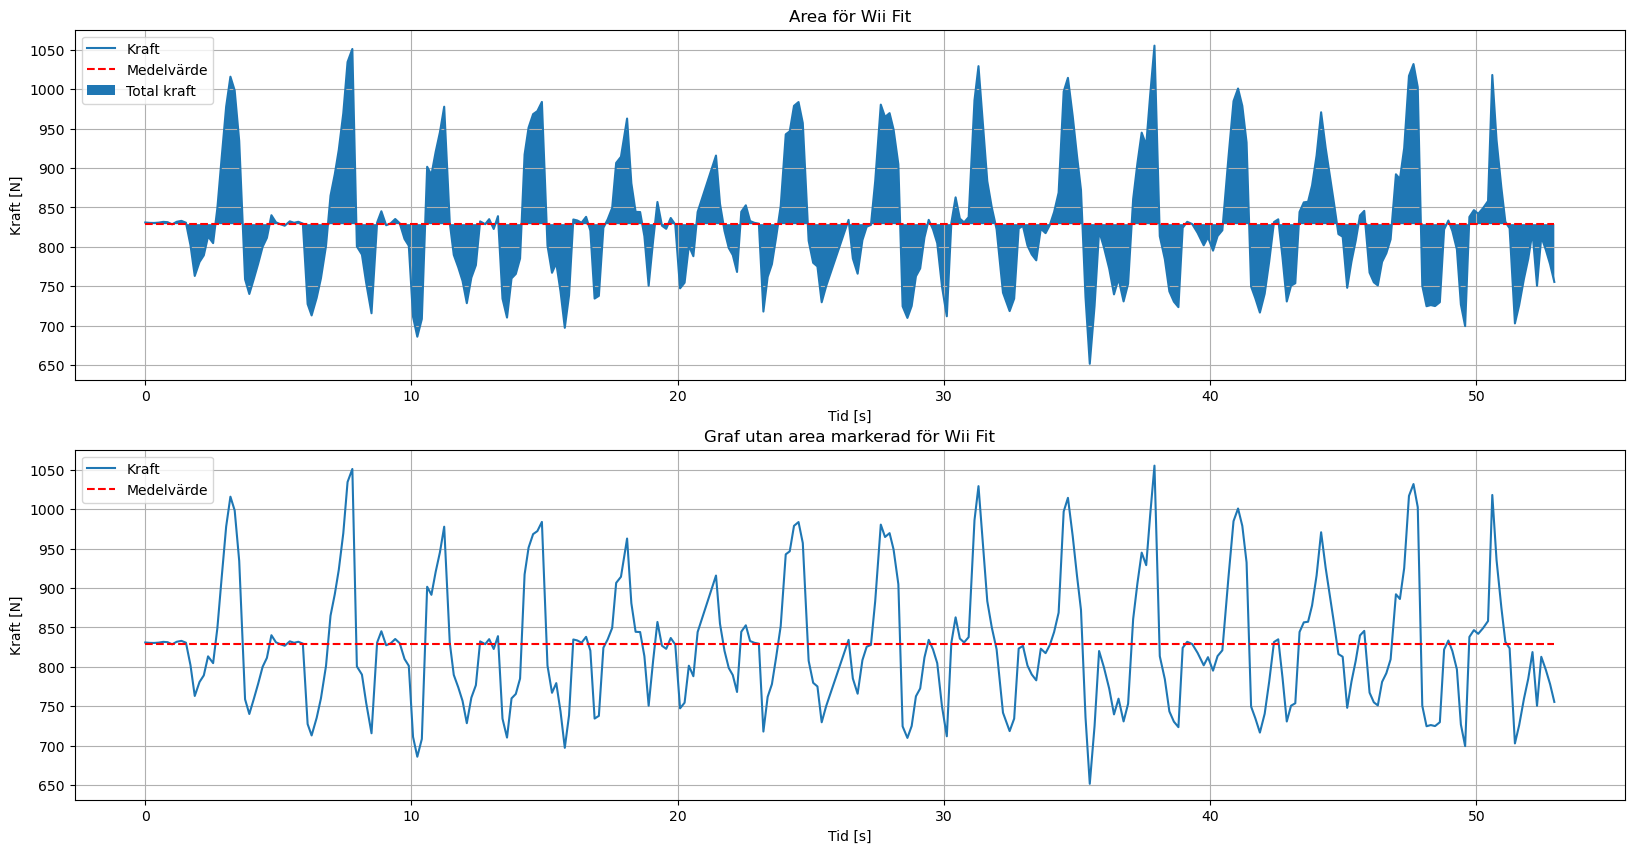

In [149]:
def showSurface(dataframe, title):
    snippetOfGraph = dataframe[0:int(dataframe.shape[0]/2)]
    horizontalLine = np.arange(0, snippetOfGraph.shape[0])

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))

    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft")
    ax1.legend()
    ax1.grid()
    ax1.set_title(f"Area för {title}")

    ax2.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax2.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
    ax2.set_xlabel("Tid [s]")
    ax2.set_ylabel("Kraft [N]")
    ax2.legend()
    ax2.grid()
    ax2.set_title(f"Graf utan area markerad för {title}")
    plt.show()

showSurface(unityDF, "Unity")
showSurface(wiiFitDF, "Wii Fit")

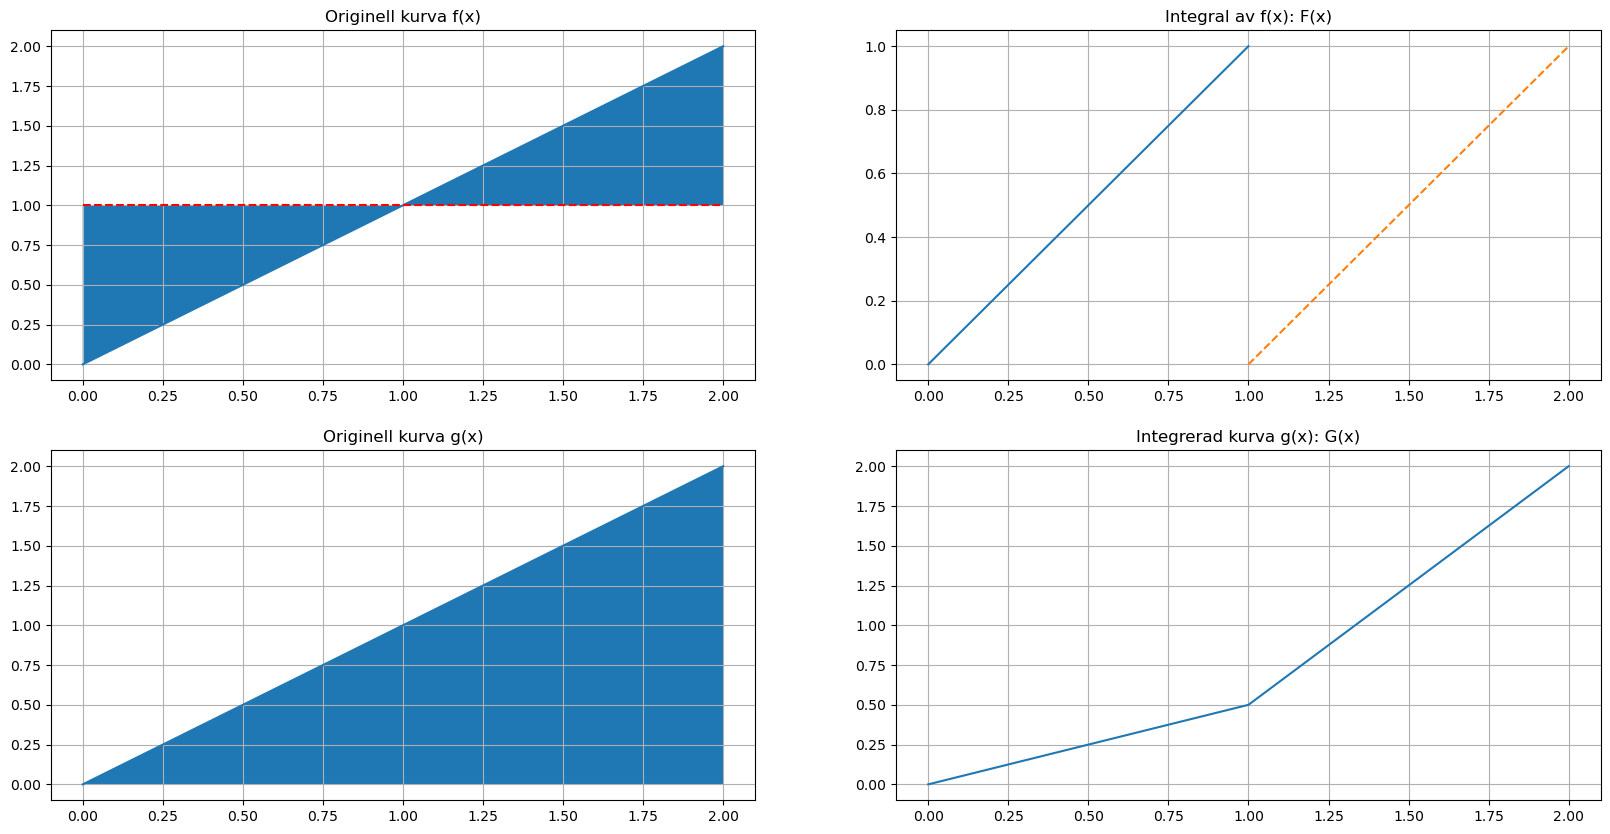

In [151]:
###############################################################
## Gammal kod
###############################################################


x_line= [0,1,2]
y_line= [0,1,2]

fig, axs = plt.subplots(2,2, figsize=(20,10))

axs[0, 0].plot(x_line,y_line)
axs[0, 0].grid()
axs[0, 0].hlines(y=1,xmin=0, xmax=2, linestyles='dashed', colors='red')
axs[0, 0].fill_between(x_line,y_line, 1)
axs[0, 0].set_title("Originell kurva f(x)")

integralFirst = cumulative_trapezoid([1,1],[0,1],initial=0)
integralSecond = cumulative_trapezoid([1,1],[1,2],initial=0)

axs[0, 1].plot([0,1],integralFirst)
axs[0, 1].plot([1,2],integralSecond, linestyle='dashed')
axs[0, 1].grid()
axs[0, 1].set_title("Integral av f(x): F(x)")


axs[1, 0].plot(x_line,y_line)
axs[1, 0].grid()
axs[1, 0].fill_between(x_line,y_line, 0)
axs[1, 0].set_title("Originell kurva g(x)")


integral2 = cumulative_trapezoid(y_line,x_line,initial=0, )
axs[1, 1].plot(x_line,integral2)
axs[1, 1].grid()
axs[1, 1].set_title("Integrerad kurva g(x): G(x)")

plt.show()

#############################
#############################
#############################
#############################
#############################

# Första integralen är inte korrekt!!!!

#############################
#############################
#############################
#############################
#############################



False


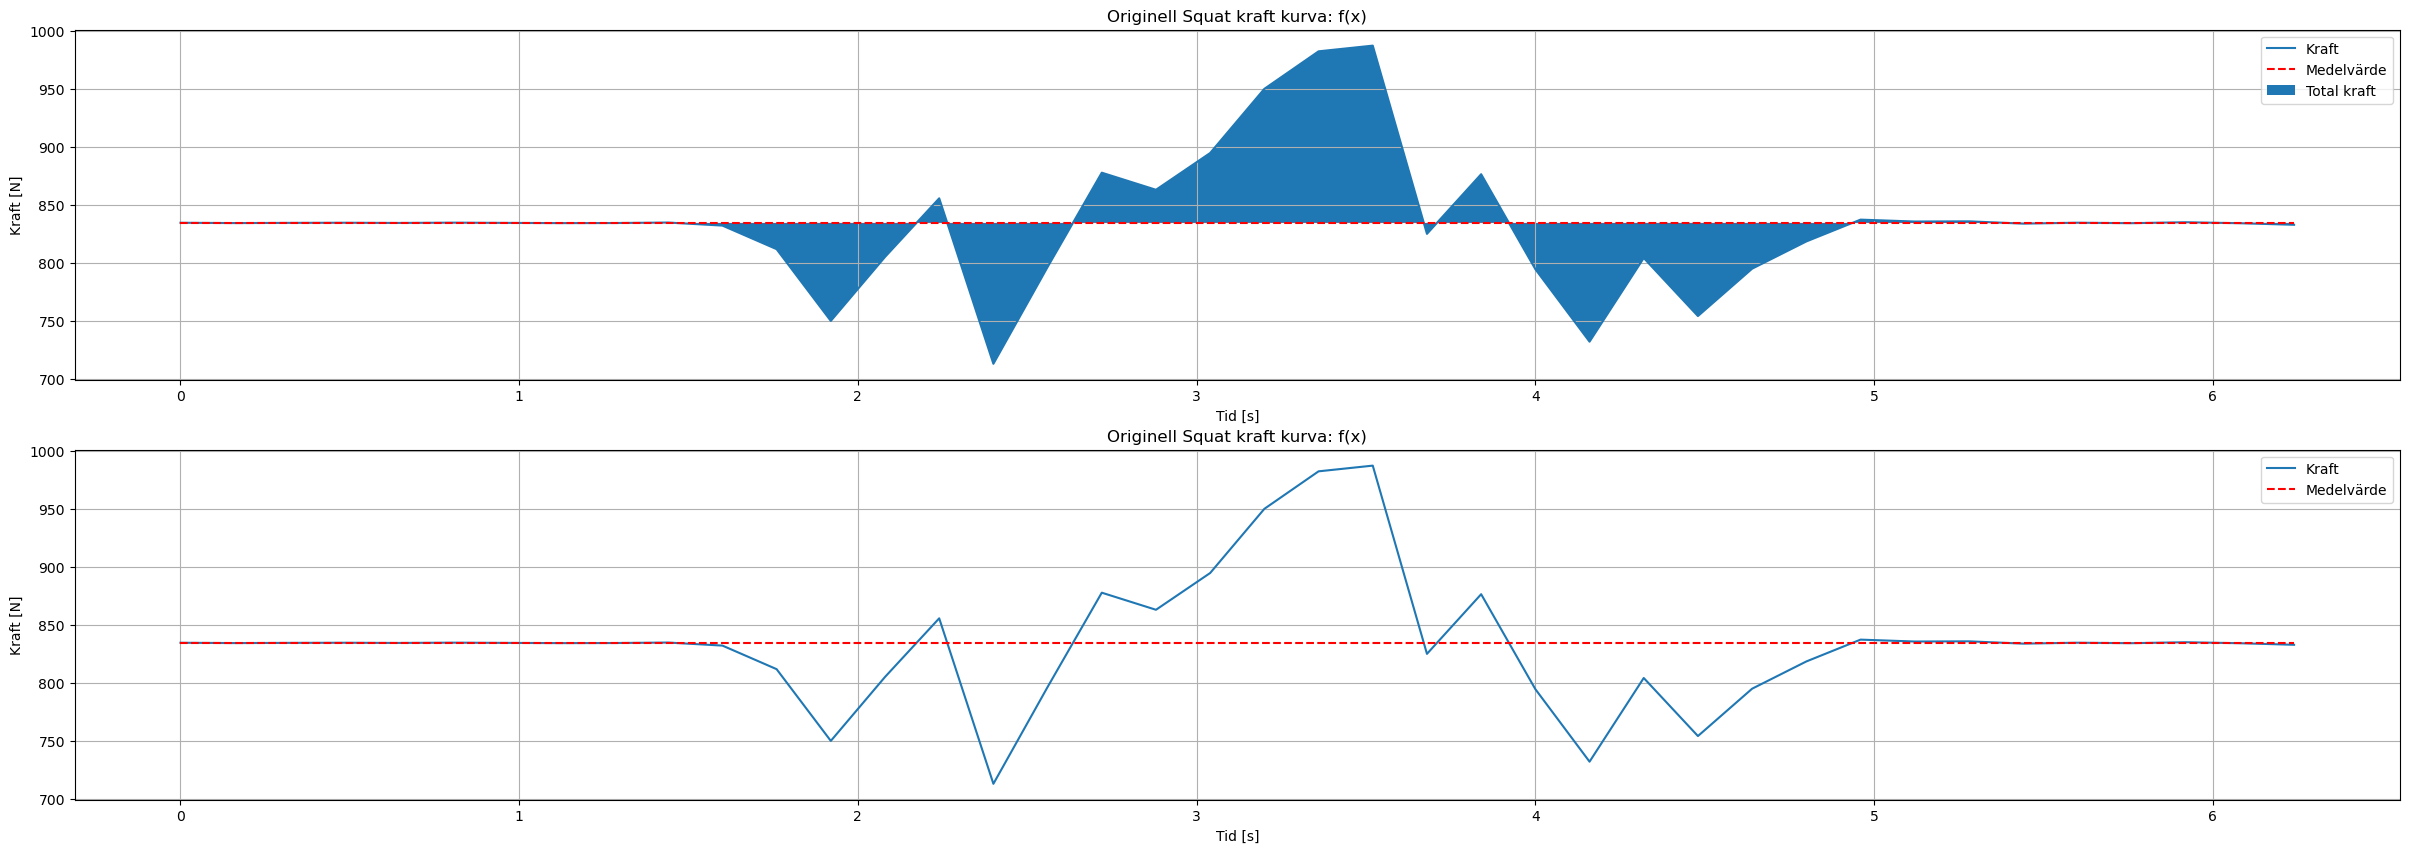

In [152]:
###############################################################
## Gammal kod
###############################################################



snippetOfGraph = unityDF[0:40]
horizontalLine = np.arange(0, snippetOfGraph.shape[0])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,10))

ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft")
ax1.legend()
ax1.set_title("Originell Squat kraft kurva: f(x)")
ax1.grid()

ax2.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax2.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax2.set_xlabel("Tid [s]")
ax2.set_ylabel("Kraft [N]")
ax2.legend()
ax2.grid()
ax2.set_title("Originell Squat kraft kurva: f(x)")

i = 0
mean = snippetOfGraph['force'].mean()
while(i < snippetOfGraph.shape[0]):
    if(snippetOfGraph['force'][i] == mean):
        ax2.plot(snippetOfGraph['time'][i],snippetOfGraph['force'][i], marker="X")
    i = i + 1
print(snippetOfGraph['force'][0]==mean)
y_filler=np.full((snippetOfGraph.shape[0]),snippetOfGraph['force'].mean())
integralOfSnippet = cumulative_trapezoid(y_filler,snippetOfGraph['force'],initial=0)

##Hitta indices och beräkna area därimellan
##https://stackoverflow.com/questions/28766692/how-to-find-the-intersection-of-two-graphs


#print(integralOfSnippet)
#ax3.plot(snippetOfGraph['time'], integralOfSnippet)
#ax3.grid()
#ax3.set_title("Integral av f(x): F(x)")

plt.show()

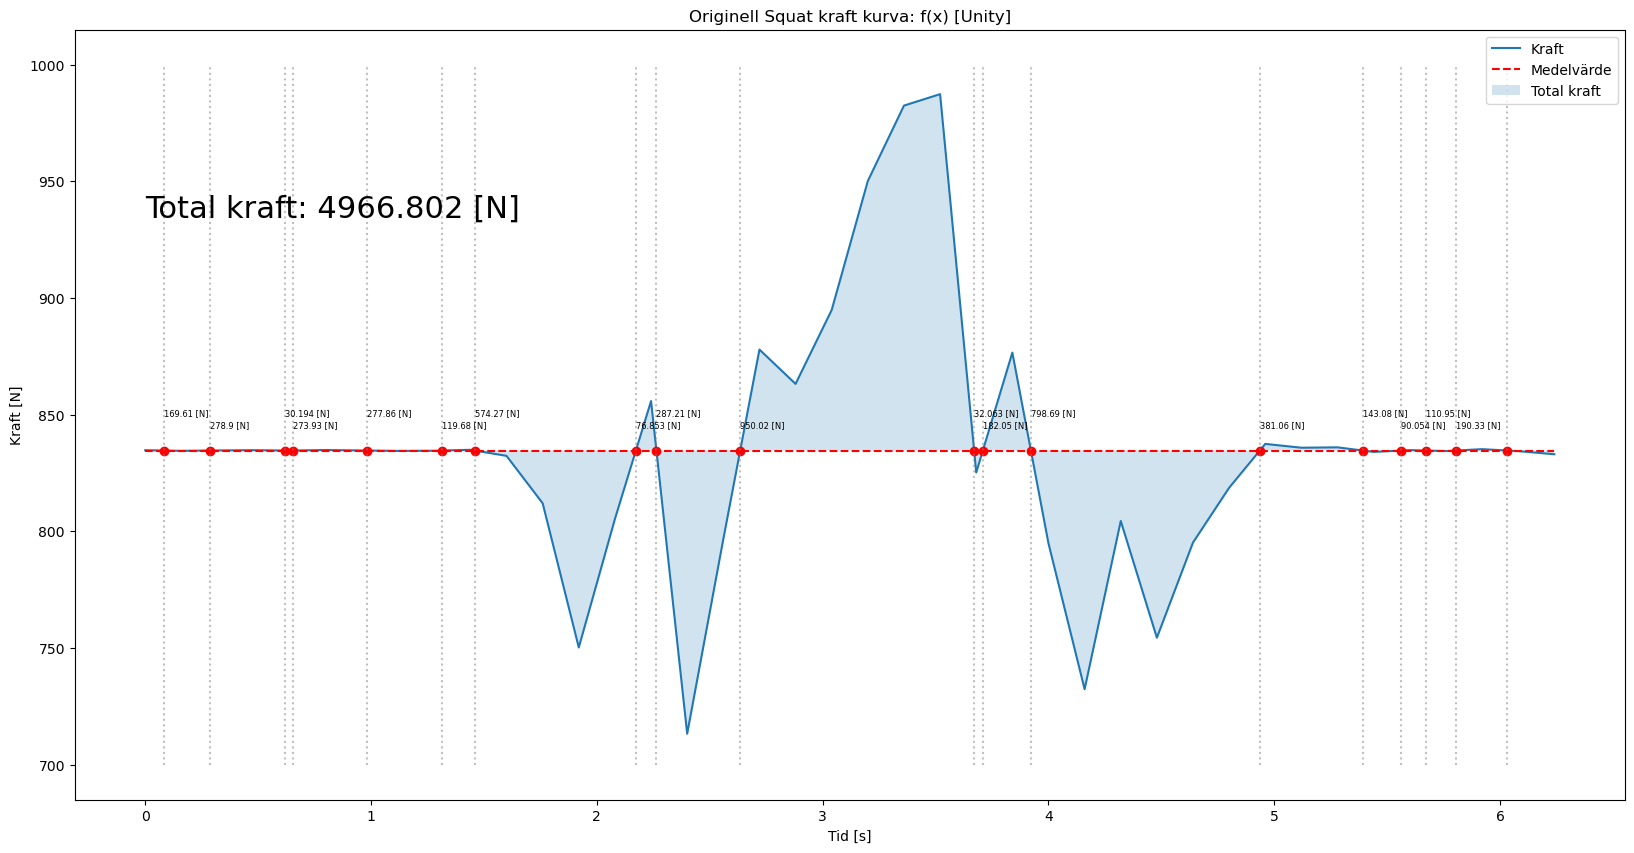

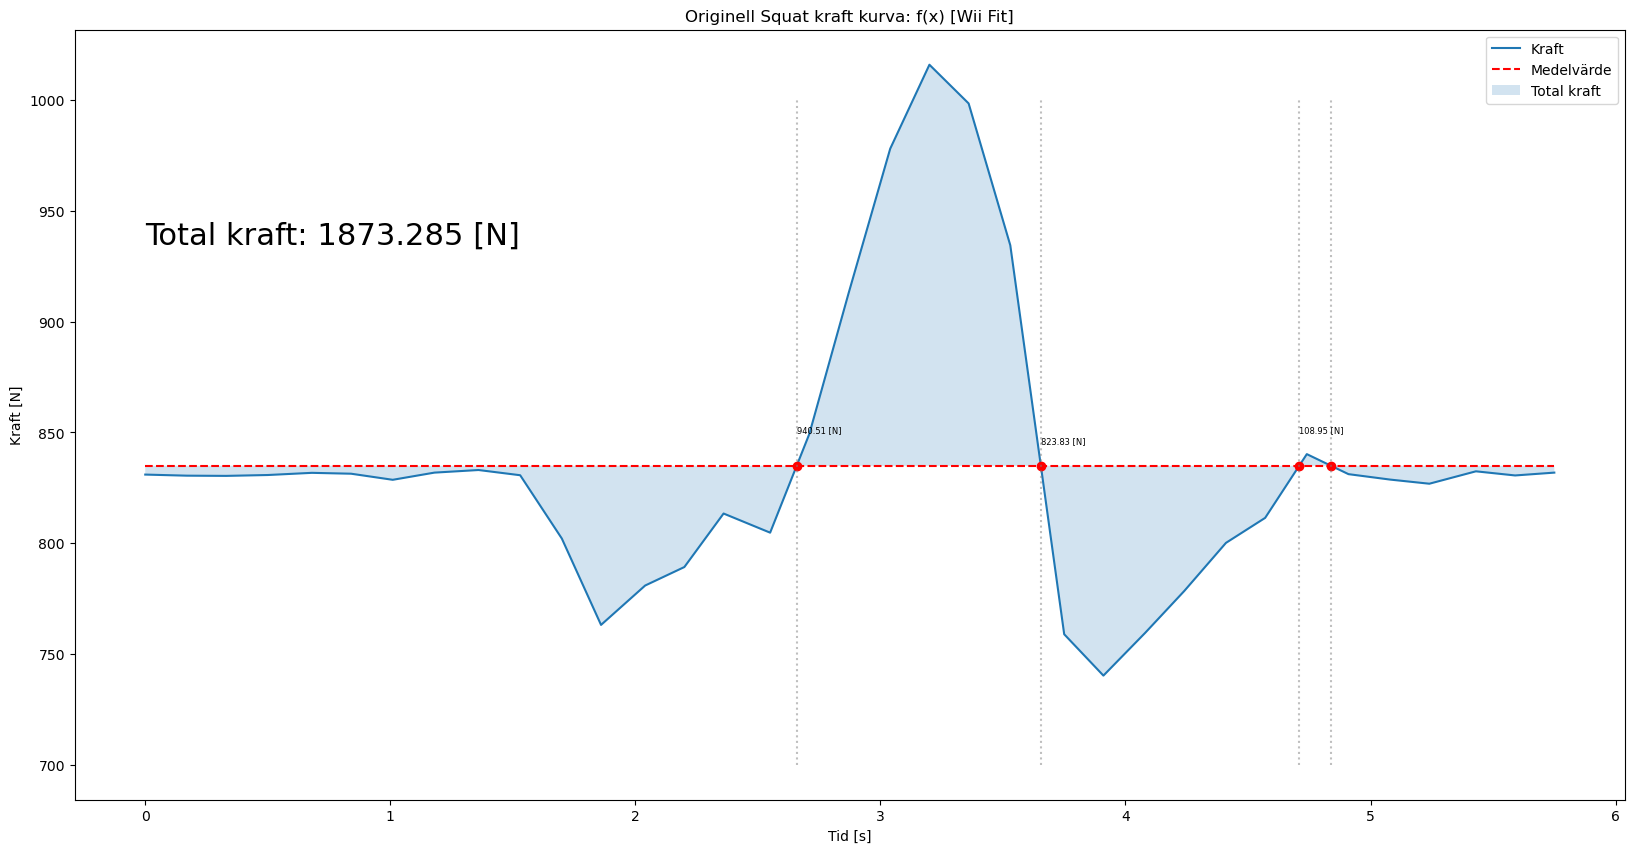

In [167]:
import numpy as np
import matplotlib.pyplot as plt

def getAndShowSurfaceOfDFWithMean(dataframe, toRange, title):

    snippetOfGraph = dataframe[0:toRange]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    #ax1.grid()
    ax1.set_title(f"Originell Squat kraft kurva: f(x) [{title}]")


    from shapely.geometry import LineString

    meanArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].mean())

    line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
    line_2 = LineString(np.column_stack((meanArr,snippetOfGraph['time'])))

    intersection = line_1.intersection(line_2)

    intersection.geoms

    time = []
    force = []
    for geom in intersection.geoms:
        time.append(geom.y)
        force.append(geom.x)
    
    #ax1.plot(time, force, 'ro')
    #ax1.vlines(ymax=1000, ymin=700, x=time, linestyles="dotted", colors="gray", alpha=0.5)
    #ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Sortera time och force listorna.
    sortedTime = []

    sortedForce = []

    i = 0


    while(len(time) != 0):
        i = time.index(min(time))
        sortedTime.append(min(time))    
        sortedForce.append(force[i])
        
        time.pop(i)
        force.pop(i)
        
    ax1.plot(sortedTime, sortedForce, 'ro')
    ax1.vlines(ymax=1000, ymin=700, x=sortedTime, linestyles="dotted", colors="gray", alpha=0.5)
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Integrera mellan de givna punkterna
    sumForce = 0
    pos = 0
    spacer = 1
    while(pos < len(sortedTime)):
        # Skapa scliecs av force och time variablerna
        if(pos == len(sortedTime)-1):
            break
        
        timeSlice = []
        forceSlice = []
        
        # Första värdet och sista värdet blir givet av sortedTime & sortedForce vilket är där linjerna korsar varann
        timeSlice.append(sortedTime[pos])
        forceSlice.append(sortedForce[pos])



        # Lägg in värden av snippetOfGraph['force] & snippetOfGraph['time'] i slices
        i = 0
        while(True):
            # Lägg till de värden som kommer imellan de två 'intersections' som finns.
            if(snippetOfGraph['time'][i] == sortedTime[pos] or snippetOfGraph['time'][i] < sortedTime[pos]):
                i = i + 1
                continue
            if(snippetOfGraph['time'][i] == sortedTime[pos + 1] or snippetOfGraph['time'][i] > sortedTime[pos + 1]):
                break

            timeSlice.append(snippetOfGraph['time'][i])
            forceSlice.append(snippetOfGraph['force'][i])
            i = i + 1
            
        
        timeSlice.append(sortedTime[pos+1])
        forceSlice.append(sortedForce[pos+1])
        
        #print(f"timeSlice (pos {pos} - {pos + 1}): {timeSlice}")
        

        # Utför en integral med cumulative_trapezoid    
        sliceIntegral = cumulative_trapezoid(y=forceSlice, x=timeSlice, initial=0)
        #print(f"Integral values: {sliceIntegral}")
        #print(f"Integral value: {sliceIntegral[len(sliceIntegral)-1]} [N]\n")


        # Ta det sista värdet i arreyen som funktionen returnarar.
        # Som sist addera integralvärdet till en summa.
        ax1.text(sortedTime[pos], snippetOfGraph['force'].mean() + 10 + 5 * spacer, f'{sliceIntegral[len(sliceIntegral)-1]:.5} [N]', fontsize = 6)
        sumForce = sumForce + sliceIntegral[len(sliceIntegral)-1]
        if(spacer == 1):
            spacer = 0
        else:
            spacer = 1
            
        # Gå till nästa punkt.
        pos = pos + 1

    ax1.text(0, snippetOfGraph['force'].mean() + 100, f'Total kraft: {sumForce:.7} [N]', fontsize = 22)

    ax1.legend()
    plt.show()

getAndShowSurfaceOfDFWithMean(unityDF, 40, "Unity")
getAndShowSurfaceOfDFWithMean(wiiFitDF, 35, "Wii Fit")



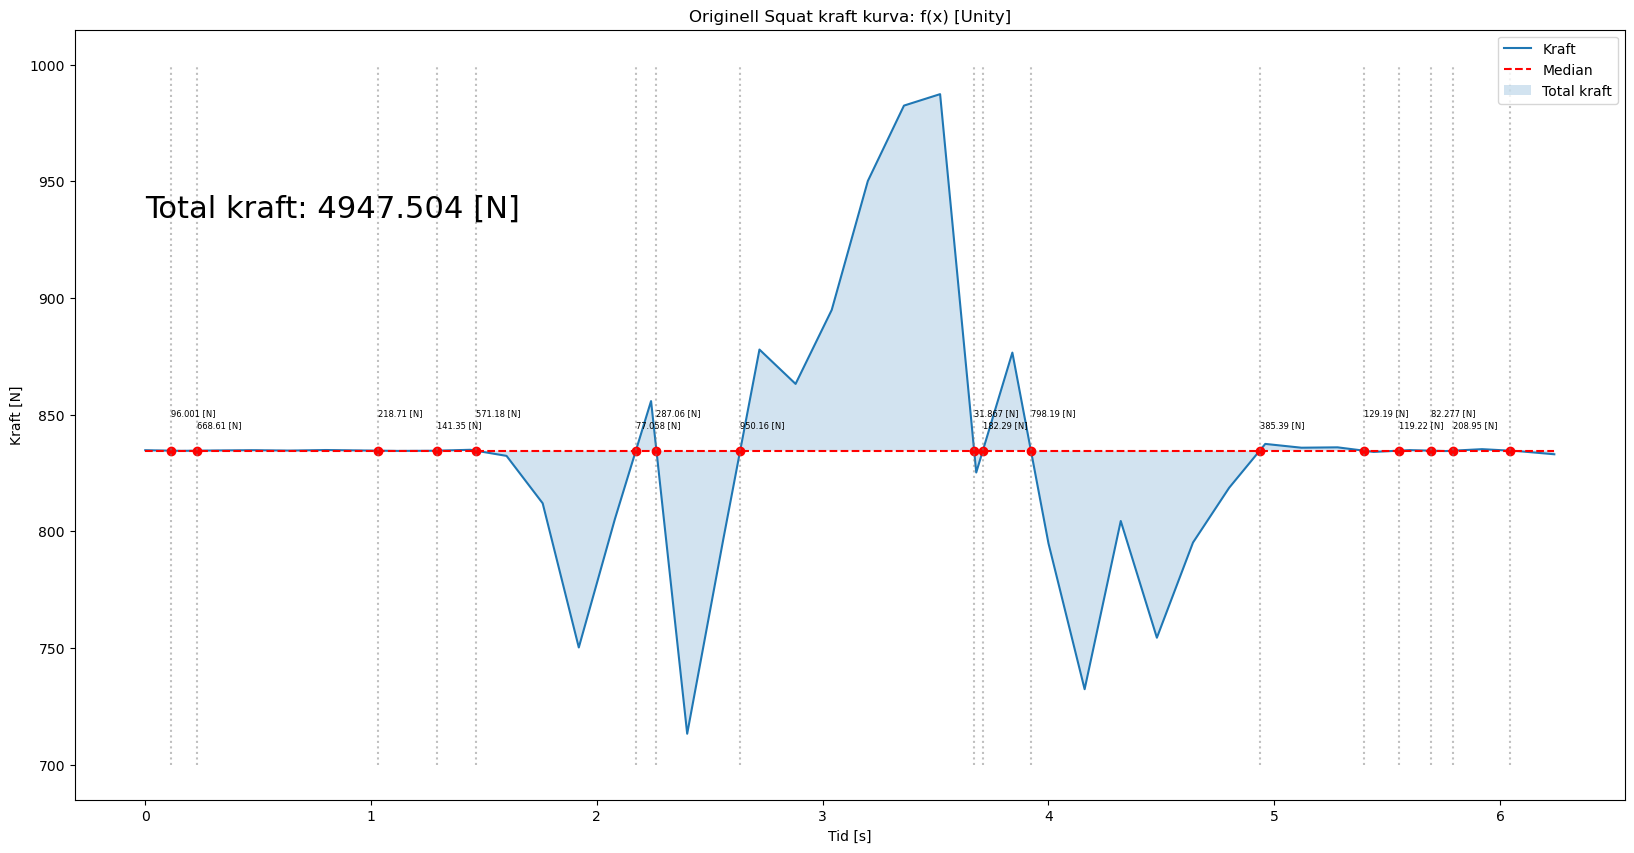

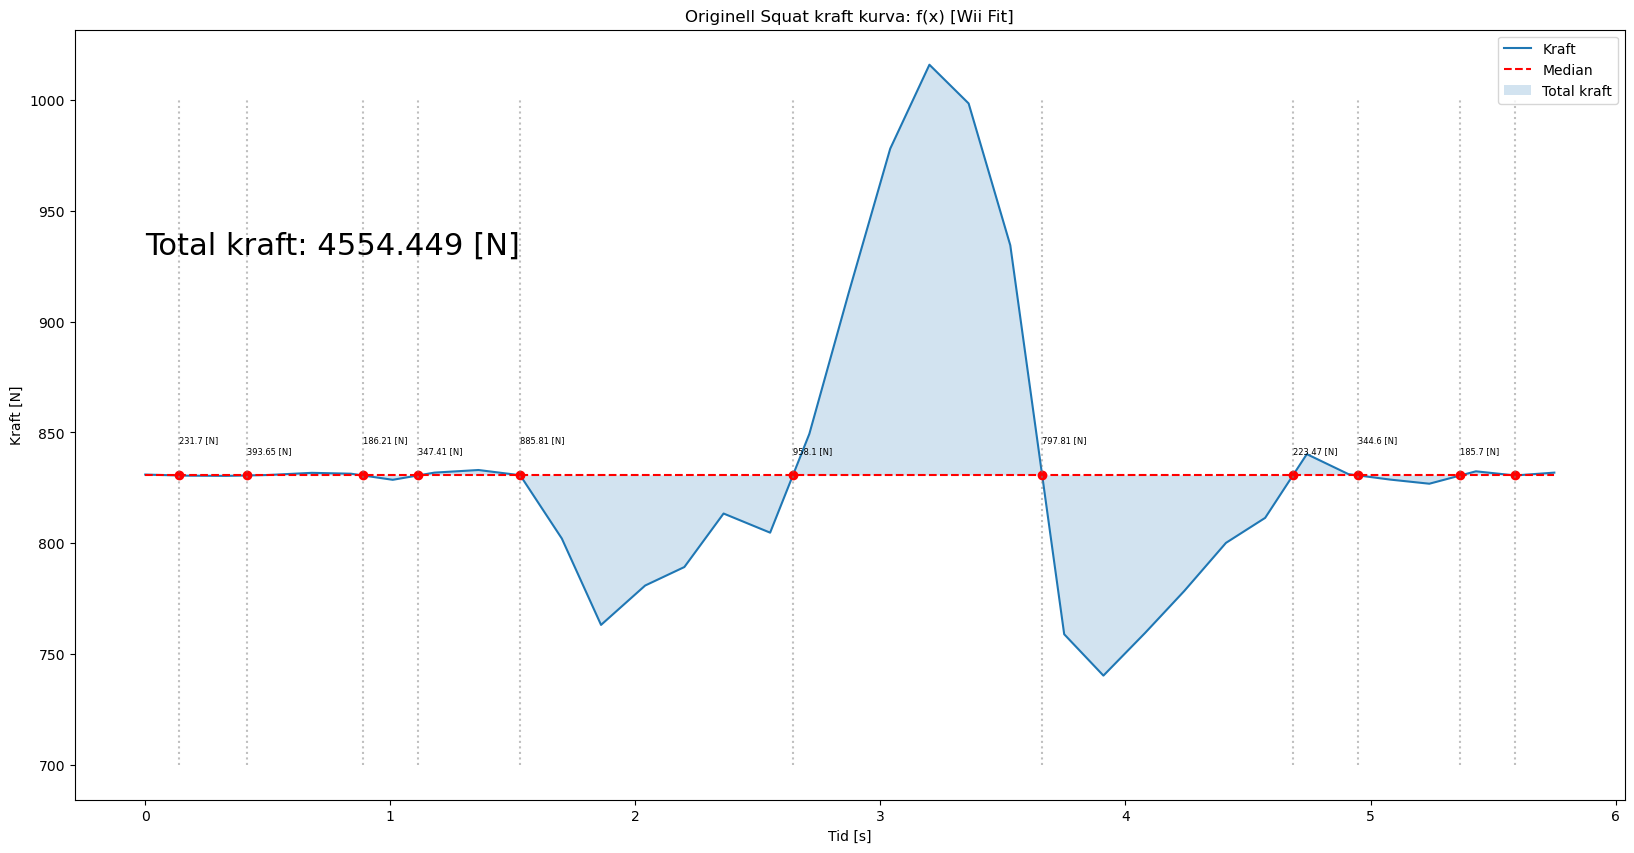

In [166]:
import numpy as np
import matplotlib.pyplot as plt

def getAndShowSurfaceOfDFWithMedian(dataframe, toRange, title):

    snippetOfGraph = dataframe[0:toRange]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].median(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Median")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    #ax1.grid()
    ax1.set_title(f"Originell Squat kraft kurva: f(x) [{title}]")


    from shapely.geometry import LineString

    medianArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].median())

    line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
    line_2 = LineString(np.column_stack((medianArr,snippetOfGraph['time'])))

    intersection = line_1.intersection(line_2)

    intersection.geoms

    time = []
    force = []
    for geom in intersection.geoms:
        time.append(geom.y)
        force.append(geom.x)
    
    #ax1.plot(time, force, 'ro')
    #ax1.vlines(ymax=1000, ymin=700, x=time, linestyles="dotted", colors="gray", alpha=0.5)
    #ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Sortera time och force listorna.
    sortedTime = []

    sortedForce = []

    i = 0


    while(len(time) != 0):
        i = time.index(min(time))
        sortedTime.append(min(time))    
        sortedForce.append(force[i])
        
        time.pop(i)
        force.pop(i)
        
    ax1.plot(sortedTime, sortedForce, 'ro')
    ax1.vlines(ymax=1000, ymin=700, x=sortedTime, linestyles="dotted", colors="gray", alpha=0.5)
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].median(), label="Total kraft", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Integrera mellan de givna punkterna
    sumForce = 0
    pos = 0
    spacer = 1
    while(pos < len(sortedTime)):
        # Skapa scliecs av force och time variablerna
        if(pos == len(sortedTime)-1):
            break
        
        timeSlice = []
        forceSlice = []
        
        # Första värdet och sista värdet blir givet av sortedTime & sortedForce vilket är där linjerna korsar varann
        timeSlice.append(sortedTime[pos])
        forceSlice.append(sortedForce[pos])



        # Lägg in värden av snippetOfGraph['force] & snippetOfGraph['time'] i slices
        i = 0
        while(True):
            # Lägg till de värden som kommer imellan de två 'intersections' som finns.
            if(snippetOfGraph['time'][i] == sortedTime[pos] or snippetOfGraph['time'][i] < sortedTime[pos]):
                i = i + 1
                continue
            if(snippetOfGraph['time'][i] == sortedTime[pos + 1] or snippetOfGraph['time'][i] > sortedTime[pos + 1]):
                break

            timeSlice.append(snippetOfGraph['time'][i])
            forceSlice.append(snippetOfGraph['force'][i])
            i = i + 1
            
        
        timeSlice.append(sortedTime[pos+1])
        forceSlice.append(sortedForce[pos+1])
        
        #print(f"timeSlice (pos {pos} - {pos + 1}): {timeSlice}")
        

        # Utför en integral med cumulative_trapezoid    
        sliceIntegral = cumulative_trapezoid(y=forceSlice, x=timeSlice, initial=0)
        #print(f"Integral values: {sliceIntegral}")
        #print(f"Integral value: {sliceIntegral[len(sliceIntegral)-1]} [N]\n")


        # Ta det sista värdet i arreyen som funktionen returnarar.
        # Som sist addera integralvärdet till en summa.
        ax1.text(sortedTime[pos], snippetOfGraph['force'].median() + 10 + 5 * spacer, f'{sliceIntegral[len(sliceIntegral)-1]:.5} [N]', fontsize = 6)
        sumForce = sumForce + sliceIntegral[len(sliceIntegral)-1]
        if(spacer == 1):
            spacer = 0
        else:
            spacer = 1
            
        # Gå till nästa punkt.
        pos = pos + 1

    ax1.text(0, snippetOfGraph['force'].median() + 100, f'Total kraft: {sumForce:.7} [N]', fontsize = 22)

    ax1.legend()
    plt.show()

getAndShowSurfaceOfDFWithMedian(unityDF, 40, "Unity")
getAndShowSurfaceOfDFWithMedian(wiiFitDF, 35, "Wii Fit")



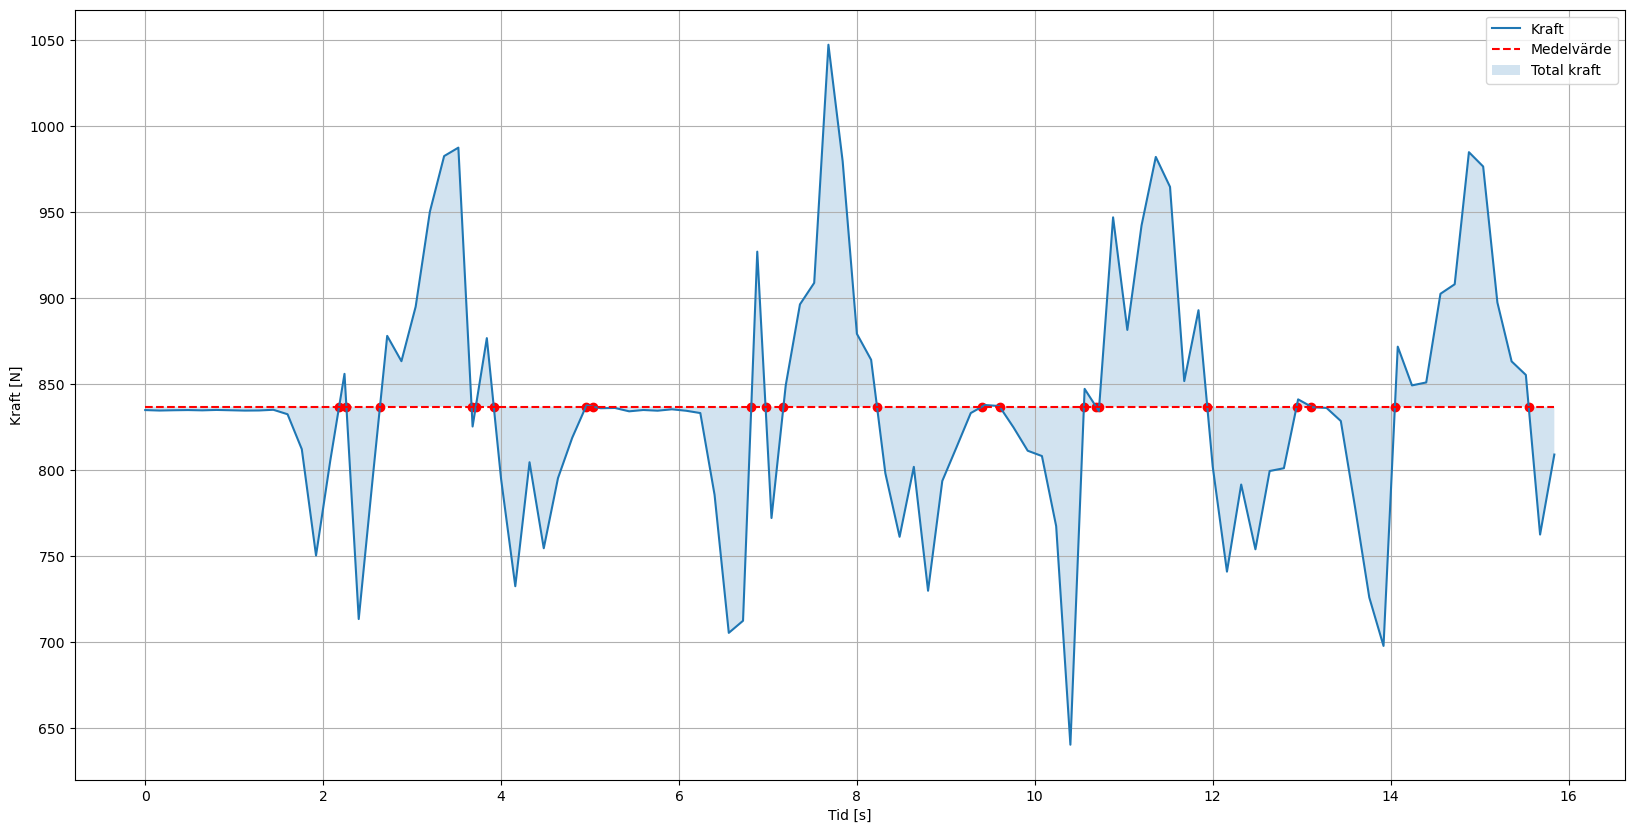

In [168]:

snippetOfGraph = unityDF[0:100]

fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

meanArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].mean())

line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
line_2 = LineString(np.column_stack((meanArr,snippetOfGraph['time'])))

intersection = line_1.intersection(line_2)

#intersection.geoms
time = []
force = []
for geom in intersection.geoms:
    time.append(geom.y)
    force.append(geom.x)
 
ax1.plot(time, force, 'ro')


ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
ax1.legend()
ax1.grid()

plt.show()

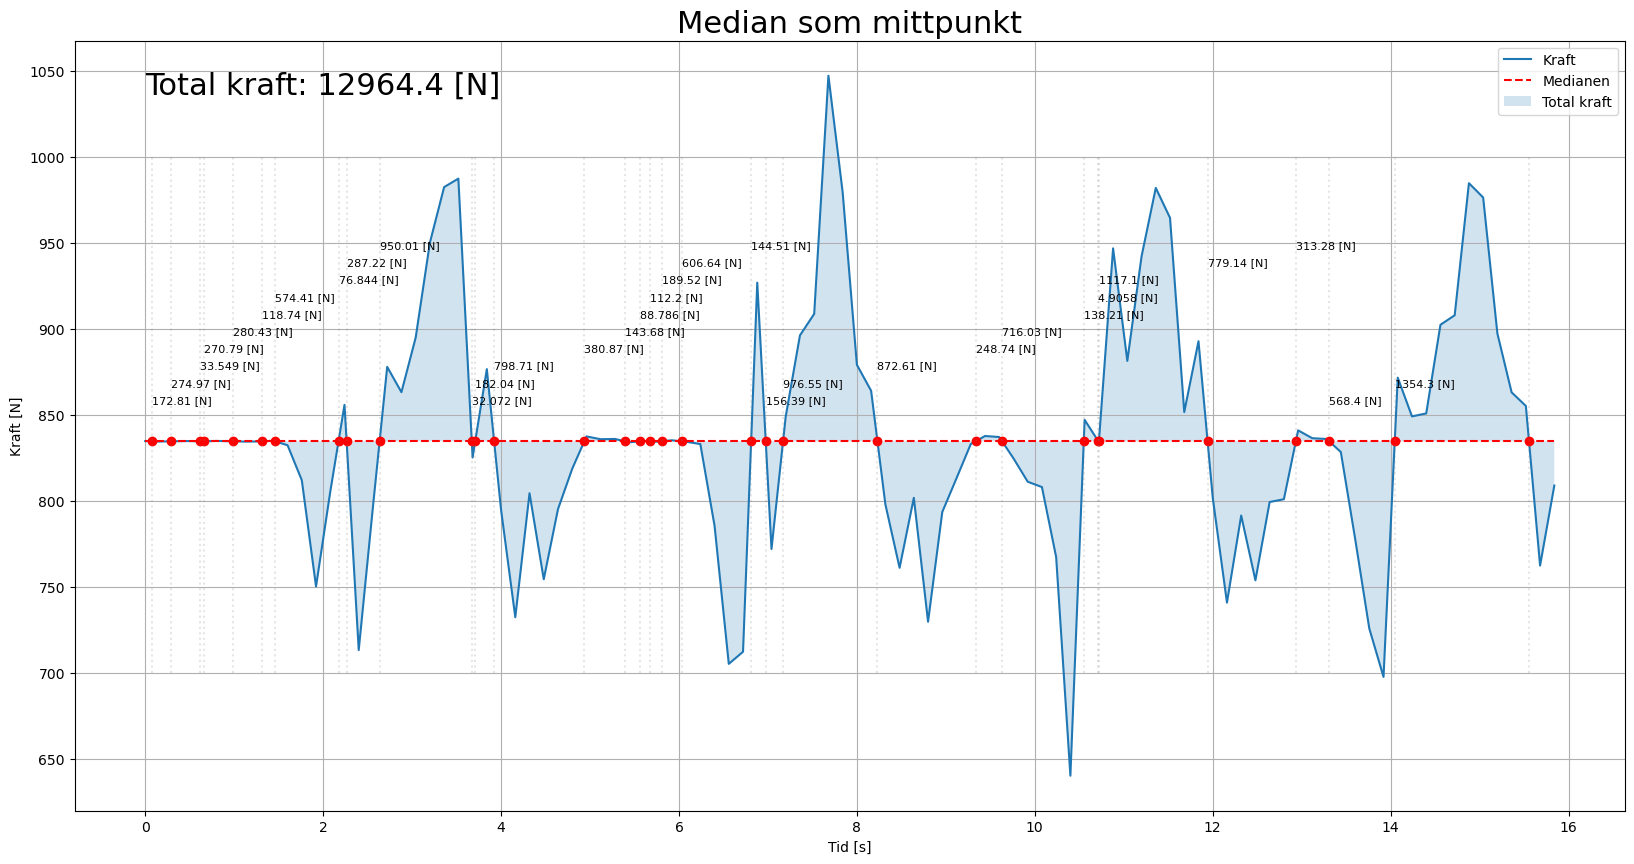

In [169]:


def integrateDFwithMedian(dataframe, title):
    snippetOfGraph = dataframe[0:100]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    medianArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].median())


    line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
    line_2 = LineString(np.column_stack((medianArr,snippetOfGraph['time'])))

    intersection = line_1.intersection(line_2)

    #intersection.geoms
    time = []
    force = []
    for geom in intersection.geoms:
        time.append(geom.y)
        force.append(geom.x)


    ## Bytte mittenlinjen till median istället för mean för att testa
    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].median(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medianen")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].median(), label="Total kraft", alpha=0.2)
    ax1.grid()
    ax1.set_title("Median som mittpunkt", fontsize=22)



    # Sortera time och force listorna.
    sortedTime = []

    sortedForce = []

    i = 0


    while(len(time) != 0):
        i = time.index(min(time))
        sortedTime.append(min(time))    
        sortedForce.append(force[i])
        
        time.pop(i)
        force.pop(i)
        
    ax1.plot(sortedTime, sortedForce, 'ro')
    ax1.vlines(ymax=1000, ymin=700, x=sortedTime, linestyles="dotted", colors="gray", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Integrera mellan de givna punkterna
    sumForce = 0
    pos = 0
    spacer = 1
    while(pos < len(sortedTime)):
        # Skapa scliecs av force och time variablerna
        if(pos == len(sortedTime)-1):
            break
        
        timeSlice = []
        forceSlice = []
        
        # Första värdet och sista värdet blir givet av sortedTime & sortedForce vilket är där linjerna korsar varann
        timeSlice.append(sortedTime[pos])
        forceSlice.append(sortedForce[pos])



        # Lägg in värden av snippetOfGraph['force] & snippetOfGraph['time'] i slices
        i = 0
        while(True):
            # Lägg till de värden som kommer imellan de två 'intersections' som finns.
            if(snippetOfGraph['time'][i] == sortedTime[pos] or snippetOfGraph['time'][i] < sortedTime[pos]):
                i = i + 1
                continue
            if(snippetOfGraph['time'][i] == sortedTime[pos + 1] or snippetOfGraph['time'][i] > sortedTime[pos + 1]):
                break

            timeSlice.append(snippetOfGraph['time'][i])
            forceSlice.append(snippetOfGraph['force'][i])
            i = i + 1
            
        
        timeSlice.append(sortedTime[pos+1])
        forceSlice.append(sortedForce[pos+1])
        
        #print(f"timeSlice (pos {pos} - {pos + 1}): {timeSlice}")
        

        # Utför en integral med cumulative_trapezoid    
        sliceIntegral = cumulative_trapezoid(y=forceSlice, x=timeSlice, initial=0)
        #print(f"Integral values: {sliceIntegral}")
        #print(f"Integral value: {sliceIntegral[len(sliceIntegral)-1]} [N]\n")


        # Ta det sista värdet i arreyen som funktionen returnarar.
        # Som sist addera integralvärdet till en summa.
        ax1.text(sortedTime[pos], snippetOfGraph['force'].mean() + 10 + 10 * spacer, f'{sliceIntegral[len(sliceIntegral)-1]:.5} [N]', fontsize = 8)
        sumForce = sumForce + sliceIntegral[len(sliceIntegral)-1]
        
        if(spacer%10 == 0):
            spacer = 1
        else:
            spacer = spacer + 1
            
        # Gå till nästa punkt.
        pos = pos + 1

    ax1.text(0, snippetOfGraph['force'].mean() + 200, f'Total kraft: {sumForce:.7} [N]', fontsize = 22)

    ax1.legend()
    plt.show()

integrateDFwithMedian(unityDF, "Unity")
integrateDFwithMedian(wiiFitDF, "Wii Fit")


## Lokal maximi och minipunkter för var benböjs beräkning.

För att få ut derivatan får man gå tillbaks till grunden för vad derivata är.  
y = kx + m => k = Δy / Δx => k = y2- y1 / x2 - x1

[[Källa]](https://stackoverflow.com/questions/69000410/extract-and-plot-the-first-derivative-of-a-curve-in-python-without-knowing-its-f)

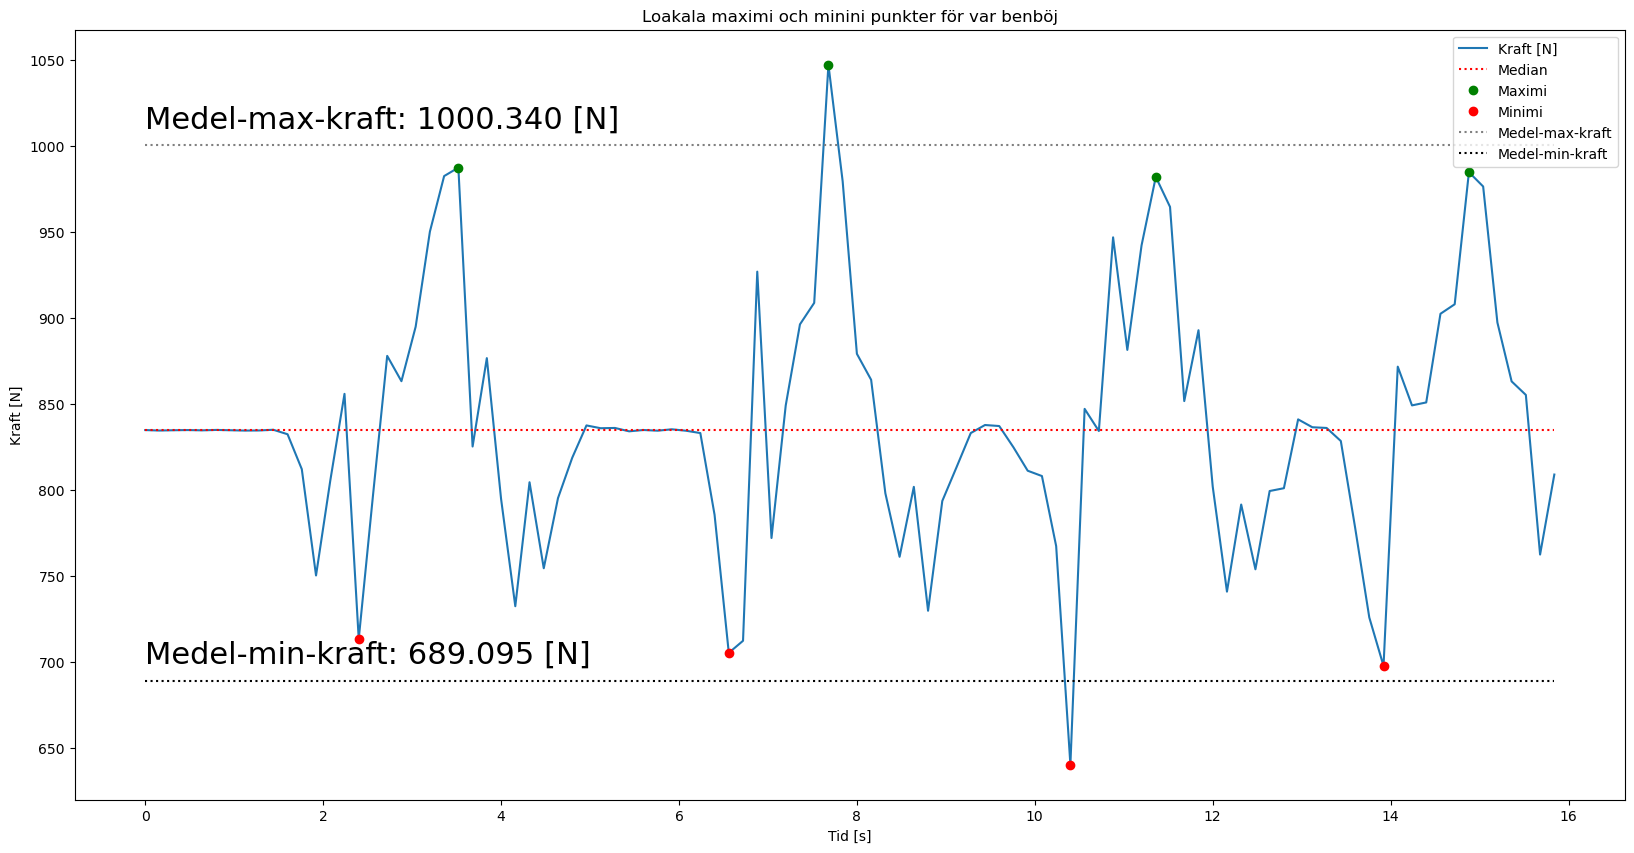

In [103]:
sliceOfData = unityDF[0:100]

fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

ax1.plot(sliceOfData['time'], sliceOfData['force'], label="Kraft [N]")
ax1.set_title("Loakala maximi och minini punkter för var benböj")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.hlines(y=sliceOfData['force'].median(), xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyle="dotted", color="red", label="Median")


## För att få ut derivatan får man gå tillbaks till grunden för vad derivata är.
## delta y / delta x.

#difference = sliceOfData.diff()
#derivative = difference.eval('force/time')
#ax1.plot(sliceOfData['time'], derivative, 'ro', label="derivative")
#ax1.vlines(sliceOfData['time'], derivative, colors="gray", alpha=0.5, ymax=1500, linestyles="dotted")
#ax1.hlines(y=0, xmin=0, xmax=16, colors="gray", alpha=0.5)




localMaximaForce = []
localMaximaTime = []

localMinimaForce = []
localMinimaTime = []


i = 1
while(i < sliceOfData['force'].shape[0]):
    if(i == sliceOfData['force'].shape[0] - 1):
        break

    if(sliceOfData['force'][i] > sliceOfData['force'][i+1] and sliceOfData['force'][i] > sliceOfData['force'][i-1]):
        localMaximaForce.append(sliceOfData['force'][i])
        localMaximaTime.append(sliceOfData['time'][i])
        i = i + 1
        continue
    
    if(sliceOfData['force'][i] < sliceOfData['force'][i+1] and sliceOfData['force'][i] < sliceOfData['force'][i-1]):
        localMinimaForce.append(sliceOfData['force'][i])
        localMinimaTime.append(sliceOfData['time'][i])
        i = i + 1
        continue
    
    i = i + 1


#ax1.plot(localMaximaTime,localMaximaForce, 'go', label="Maximi")
#ax1.plot(localMinimaTime,localMinimaForce, 'ro', label="Minimi")

# Sortera efter storlek
# Ta ut de 31 största.
# Markera
# Gör samma sak med minimi.
nrOfSquats = 4


#Maximi
dataMaxima = {
    "maxima":localMaximaForce,
    "time":localMaximaTime
}

dataframeMaxima = pd.DataFrame(data=dataMaxima)
dataframeMaxima.sort_values(by="maxima", ascending=False, inplace=True)

maximaForce = dataframeMaxima['maxima'][0:nrOfSquats]
maximaTime = dataframeMaxima['time'][0:nrOfSquats]

ax1.plot(maximaTime,maximaForce, 'go', label="Maximi")

#Minimi
dataMinima = {
    "minima":localMinimaForce,
    "time":localMinimaTime
}

dataframeMinima = pd.DataFrame(data=dataMinima)
dataframeMinima.sort_values(by="minima", ascending=True, inplace=True)

minimaForce = dataframeMinima['minima'][0:nrOfSquats]
minimaTime = dataframeMinima['time'][0:nrOfSquats]

ax1.plot(minimaTime,minimaForce, 'ro', label="Minimi")

averageMaxForce = maximaForce.mean()
averageMinForce = minimaForce.mean()

ax1.text(x=0, y=averageMaxForce + 10, s=f"Medel-max-kraft: {averageMaxForce:.3f} [N]", fontsize=22)
ax1.text(x=0, y=averageMinForce + 10, s=f"Medel-min-kraft: {averageMinForce:.3f} [N]", fontsize=22)

ax1.hlines(y=averageMaxForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-max-kraft", colors="gray")
ax1.hlines(y=averageMinForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-min-kraft", colors="black" )



ax1.legend()
plt.show()



<Axes: xlabel='Typ', ylabel='Kraft'>

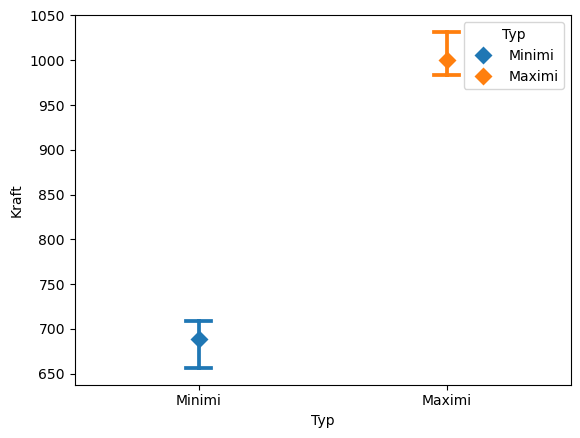

In [137]:
data0 = {
    "Typ":"Minimi",
    "Kraft":minimaForce,
}

data1 = {
    "Typ":"Maximi",
    "Kraft":maximaForce,
}

plottedDataFrame0 = pd.DataFrame(data=data0)
plottedDataFrame1 = pd.DataFrame(data=data1)

plottedDataFrame = pd.concat([plottedDataFrame0, plottedDataFrame1])



sns.pointplot(data=plottedDataFrame, x="Typ", y="Kraft", linestyles='none', markers='D', capsize=.1, hue="Typ", legend=True)